In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as transforms
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm
import numpy as np
from collections import Counter
from google.colab import drive

drive.mount('/content/drive')



path_test_dataset = "/content/drive/MyDrive/TR_DIMA/training_set_reduit"
path_model = "/content/drive/MyDrive/TR_DIMA/Entrainement/best_model_pre_classifier_training.pth"

base_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Redimensionner les images à 224x224
    transforms.ToTensor(),  # Convertir les images en tenseurs PyTorch
])

test_dataset = datasets.ImageFolder(root=path_test_dataset, transform=base_transform)

labels = test_dataset.targets

class_counts = Counter(labels)


valid_classes = test_dataset.classes

model = models.resnet50(pretrained=False)

model.fc = nn.Linear(model.fc.in_features, len(valid_classes))

model.load_state_dict(torch.load(path_model,map_location=torch.device("cpu")))


fc_layer = model.fc

weights_1 = fc_layer.weight.data

bias = fc_layer.bias.data










Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


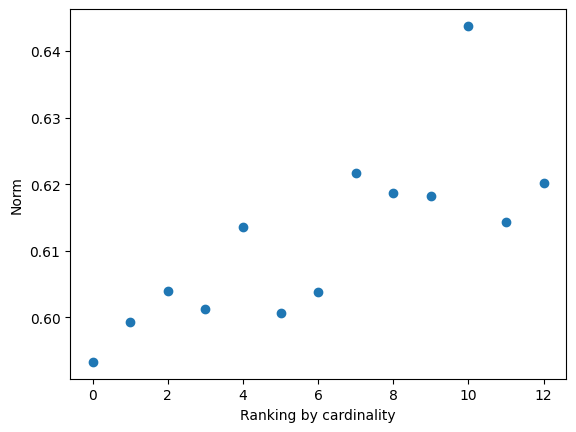

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

class_countsb = [class_counts[i] for i in range(len(valid_classes))]

# On trie et on récupère l’ordre d’origine
sorted_indices = sorted(range(len(class_countsb)), key=lambda i: class_countsb[i])

# Créer la liste de rangs
rangs = [0] * len(class_countsb)
for rang, idx in enumerate(sorted_indices):
    rangs[idx] = rang

plt.scatter(rangs, torch.norm(weights_1, dim=1))
plt.xlabel("Ranking by cardinality")
plt.ylabel("Norm")
plt.show()


